In [15]:
pwd

'/Users/surajpawar/Desktop/Time Series Forecasting with ARIMA'

In [25]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-09-28  130.690002  134.179993  130.690002  133.130005  133.130005   
247 2023-09-29  134.080002  134.889999  131.320007  131.850006  131.850006   
248 2023-10-02  132.154999  135.360001  132.065002  135.169998  135.169998   
249 2023-10-03  134.929993  135.240005  132.815002  133.300003  133.300003   
250 2023-10-04  133.660004  136.570007  133.429993  136.270004  136.270004   

       Volume  
246  18201400  
247  23224200  
248  19210400  
249  19628700  
250  22836100  


In [26]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-10-05  102.220001
1 2022-10-06  102.239998
2 2022-10-07   99.570000
3 2022-10-10   98.709999
4 2022-10-11   98.050003


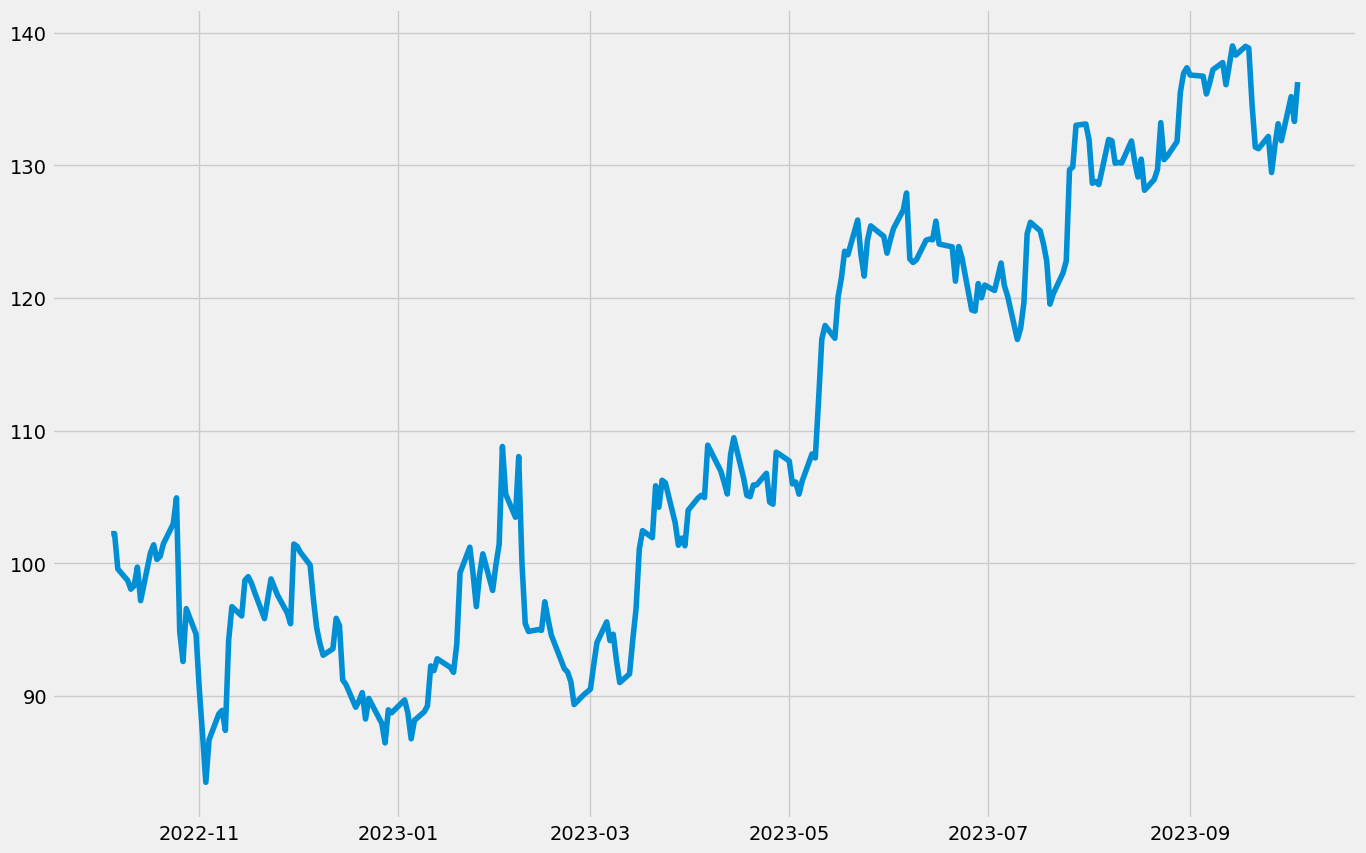

In [27]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

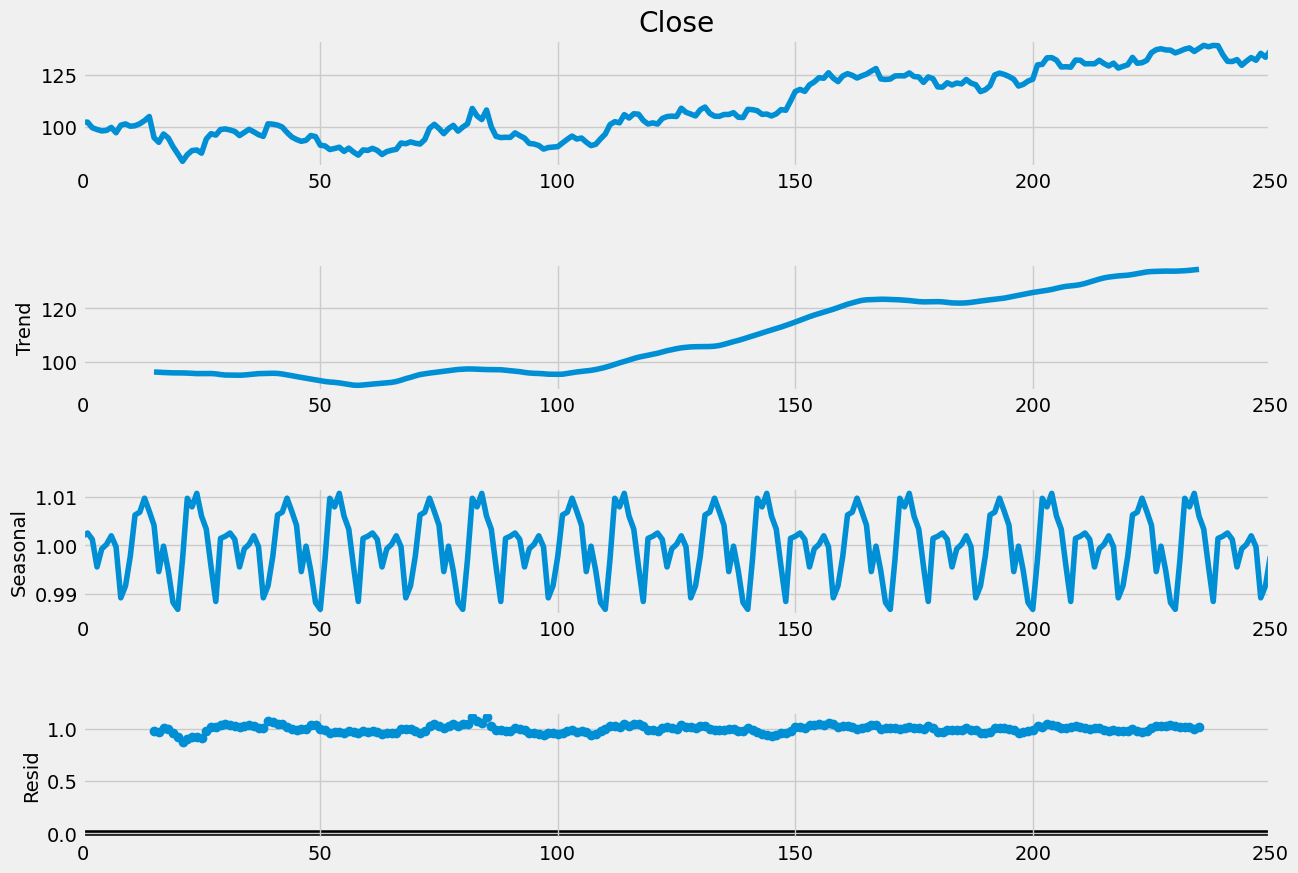

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

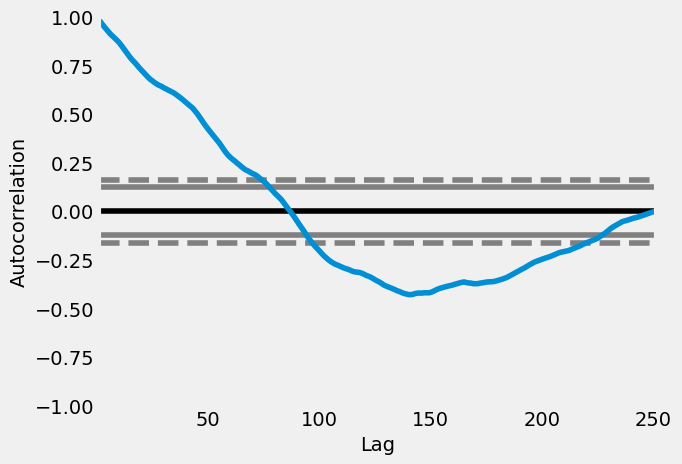

In [30]:
pd.plotting.autocorrelation_plot(data["Close"])

/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


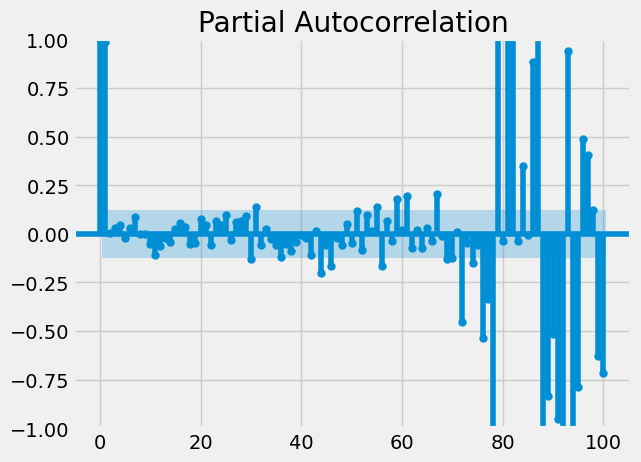

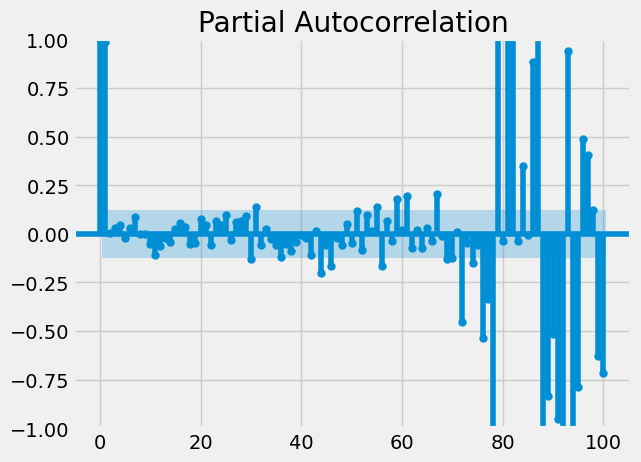

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Your code to download data (data = yf.download(...)) goes here

# Specify the values for p, d, and q
p, d, q = 5, 1, 2

# Create the ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))

# Fit the model
fitted = model.fit()

# Print the model summary
print(fitted.summary())



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -557.635
Date:                Thu, 05 Oct 2023   AIC                           1131.271
Time:                        00:25:29   BIC                           1159.443
Sample:                             0   HQIC                          1142.609
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1117      2.961      0.038      0.970      -5.692       5.916
ar.L2          0.6670      2.885      0.231      0.817      -4.987       6.321
ar.L3         -0.0224      0.462     -0.048      0.9

/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      102.220025
2      102.240841
3       99.436113
4       98.938924
          ...    
246    131.954024
247    133.050528
248    131.749608
249    135.570736
250    132.855364
Name: predicted_mean, Length: 251, dtype: float64


In [36]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25972D+00    |proj g|=  1.24622D-01


 This problem is unconstrained.



At iterate    5    f=  2.17942D+00    |proj g|=  2.27441D-02

At iterate   10    f=  2.16482D+00    |proj g|=  1.72236D-02

At iterate   15    f=  2.16301D+00    |proj g|=  2.25966D-03

At iterate   20    f=  2.16269D+00    |proj g|=  4.95442D-03

At iterate   25    f=  2.16263D+00    |proj g|=  5.16909D-04

At iterate   30    f=  2.16262D+00    |proj g|=  1.76930D-04

At iterate   35    f=  2.16258D+00    |proj g|=  3.26740D-03

At iterate   40    f=  2.16229D+00    |proj g|=  2.65608D-03

At iterate   45    f=  2.16222D+00    |proj g|=  2.41015D-03

At iterate   50    f=  2.16199D+00    |proj g|=  1.47807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/surajpawar/Desktop/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -542.660
Date:                            Thu, 05 Oct 2023   AIC                           1115.320
Time:                                    00:26:08   BIC                           1167.404
Sample:                                         0   HQIC                          1136.311
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1854      0.657     -0.282      0.778      -1.472       1.102
ar.L2          0.4219      0.597   

In [37]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    136.789240
252    134.863114
253    135.052167
254    135.067708
255    134.773352
256    134.930764
257    136.068415
258    137.548036
259    136.289621
260    136.435149
261    135.791710
Name: predicted_mean, dtype: float64


<Axes: >

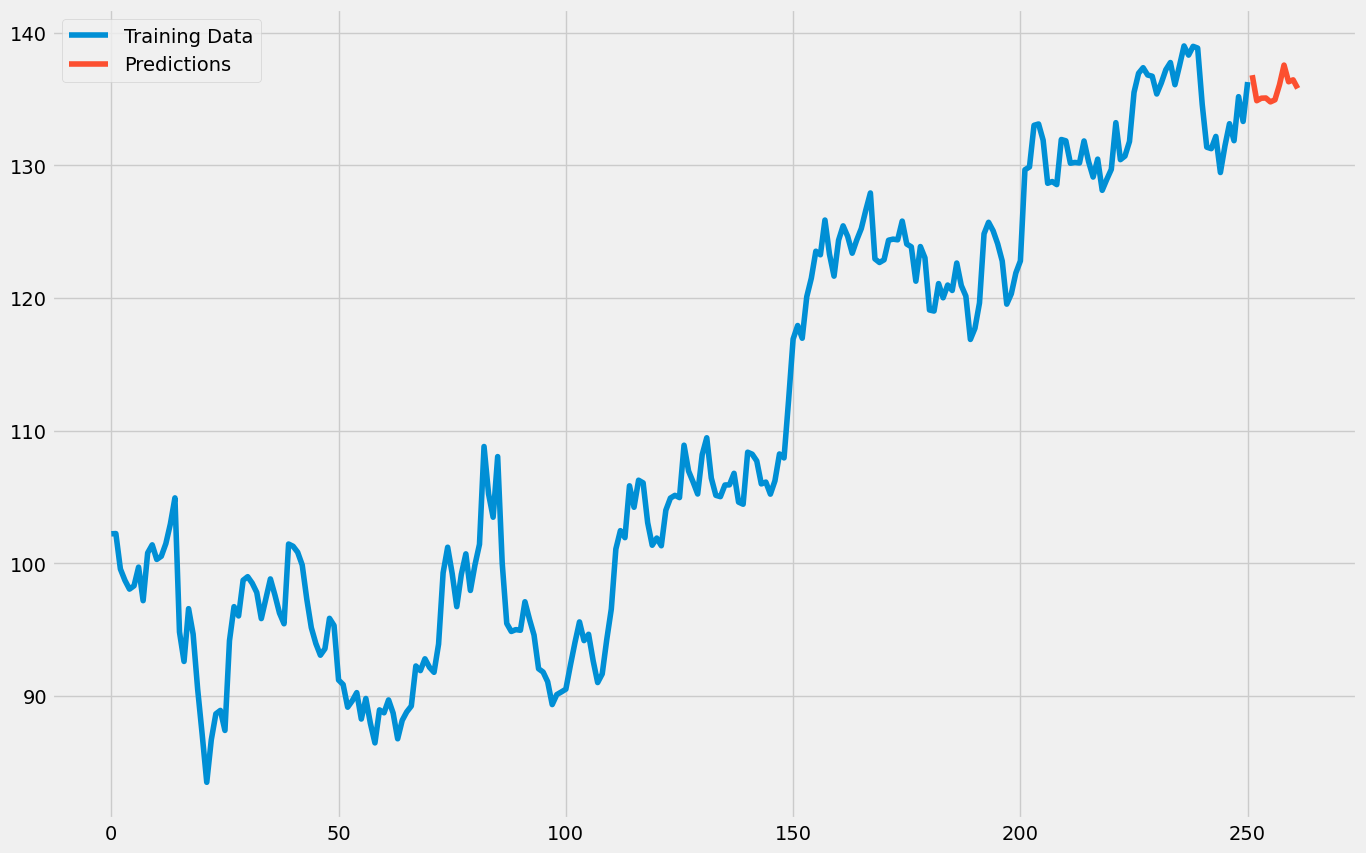

In [38]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")